# Объединение источников данных

Бывает так, что наши данные распределены по нескольким таблицам. Иногда эти данные одного вида (например, у вас есть таблица с грузоперевозками по России и по Китаю, которые имеют похожие столбцы, а проанализировать надо вместе), а иногда – дополняющие (например, список справочник "ФИО - табельный номер").

Для разных данных требуются разные подходы: вертикальное объединение (добавление строк) – append, горизонтальное (добавление столбцов) – merge.

In [ ]:
import pandas as pd
orders = pd.read_excel("Superstore.xls", sheet_name="Orders")
orders

In [ ]:
people = pd.read_excel("Superstore.xls", sheet_name="People")
people

# merge

Горизонтальное объединение похоже на ВПР: мы выбираем ключ – колонку или набор колонок, доступные в обеих таблицах, по которым хотим объединять данные (например, номер заказа), – и к этому ключу справа "прикрепляются" сначала колонки левой таблицы, потом колонки правой:

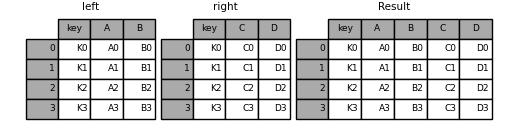

Есть 4 вида такого объединения ключей:

1. `inner` (внутреннее) – в итоговой таблице останутся только те записи, ключ по которым был и в левой, и в правой таблицах
2. `left` (левое) – в итоговой таблице останутся только те записи, ключ по которым был в левой таблице. Если ключ был в левой таблице, а в правой его не было, то поля правой таблицы будут заполнены пустым значением.
3. `right` (правое) – то же, что в предыдущем, но левая и правая таблицы поменяны местами.
4. `outer` (внешнее) – Сохраняются ключи как левой, так и правой талицы, при этом отсутствующие поля обеих таблиц будут заполнены пустыми значениями

Колонка, по которой данные будут объединяться (или несколько колонок в квадратных скобках через запятую), указывается в атрибуте on функции merge, тип объединения в атрибуте how.

In [1]:
# Найдем ФИО менеджера по региону. Появится в столбце Person.


Если в левой и правой таблицах названия столбцов различаются, то вместо параметра `on` можно использовать 2 параметра: `left_on` и `right_on`, которые задают названия столбцов в левой и правой таблицах по-отдельности.

**Обратите внимание!** Если в одной из таблиц ключ повторяется несколько, то во второй таблице строки, соответствующие этим ключам скопируются столько же раз. Удалять дубликаты научимся в следующем уроке

# append

Для вертикального объединения используется команда append, которая может быть записана как `<таблица 1>.append(<таблица 2>)`. Понятнее всего работа этой команды показана на рисунке: 

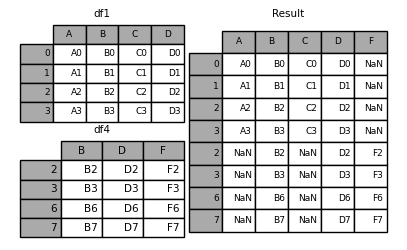

Первая таблица дополняется недостающими пустыми столбцами. После чего столбцы второй таблицы помещаются под столбцами первой по именам.

In [2]:
# Для примера возьмем две небольшие выборки из разных таблиц
# Выберем всю мебель


In [3]:
# И выберем все товары, проданные менеджером Cassandra Brandow


In [4]:
# Объединим эти данные в одну таблицу


## Переименование колонок
Что делать, если заголовки у двух таблиц разные, а вертикальное объединение нужно произвести друг под другом? Переименовать!

Самый простой синтаксис для переименования колонок – функция `<таблица>.rename(columns={'старое название', 'новое название'})`:

## Задания
В таблице `Returns` представлена информация о возвратах заказов в магазин. Выведите всю информацию о товарах, которые вернули.

Найдите все заказы, либо совершенные менеджером Anna Andreadi, либо обработанные ей. Используйте функцию `append`.